In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.special import softmax

# Primary Task = People #
# Auxiliary Tasks = {Flowers, Food_Containers} #

In [8]:
def plot(data, task_names, color, title):
    
    weights = data[:, :, 0]
    weights = softmax(weights, axis=0)
    new_data = [weights, data[:, :, 1], data[:, :, -1]]
    old_data = data
    data = np.stack(new_data, axis=-1)
    
    keys = ['task_weights [logits after softmax]' , ' - task_grad', 'dot_prod { theta_[t + 1]_dev,  theta_[t]_task }']
    fig, ax = plt.subplots(len(task_names), len(keys), figsize=(30, 16))
    fig.suptitle(title, fontsize=32)
    for j in range(data.shape[0]):
        for idx, key in enumerate(keys):
            mul_fact = 1.0
            label_ = "{} | {}".format(task_names[j], key)
            if idx == 1:
                mul_fact = -1.0
                corr_ = np.corrcoef(-old_data[j, :, 1], old_data[j, :, -1])[0, 1]
                norm = old_data[j, :, 2] * old_data[j, :, 3]
                corr_2 = np.corrcoef(-old_data[j, :, 1], old_data[j, :, -1] / norm)[0, 1]
                label_ = "[Corr w cosine = {:.3f}] {}".format(corr_2, key)
            ax[j][idx].plot(mul_fact * data[j, :, idx], label=label_, color=color)
            if idx == len(keys) - 1:
                ax[j][idx].plot([0.0]*data.shape[1], color='g')
            ax[j][idx].legend(prop={'size': 12})
            ax[j][idx].set_xlabel('Iteration[smoothed]')
    plt.show()

In [9]:
def vis_file(fname, smooth_factor=17, title='small_lr', vis_color='blue'):
    data = pkl.load(open(fname, 'rb'))
    task_names = list(data.keys())
    data_np = np.array(list(data.values()))
    max_len = (data_np.shape[1] // smooth_factor)*smooth_factor
    data_np = data_np[:, :max_len, :]
    data_np = np.reshape(data_np, (3, -1, smooth_factor, 5))
    data_np = data_np.mean(axis=2)
#     print(data_np.shape)
    plot(data_np, task_names, vis_color, title)
    return data_np

## WITHOUT GROUP BATCHING : Weight_lr = 5e-2 ##

In [10]:
files = glob("m4m_cache/ablation/*/*/*/*/weight_stats.pkl")
print(files)

['m4m_cache/ablation/val_is_meta/small_lr.softmax/meta_people/0/weight_stats.pkl', 'm4m_cache/ablation/val_is_meta/smallInner-largeOuter-lr.softmax/meta_people/0/weight_stats.pkl', 'm4m_cache/ablation/val_is_meta/stepped_lr.softmax/meta_people/0/weight_stats.pkl', 'm4m_cache/ablation/val_is_meta/large_lr.softmax/meta_people/0/weight_stats.pkl', 'm4m_cache/ablation/train_is_meta/small_lr.softmax/meta_people/0/weight_stats.pkl', 'm4m_cache/ablation/train_is_meta/smallInner-largeOuter-lr.softmax/meta_people/0/weight_stats.pkl', 'm4m_cache/ablation/train_is_meta/large_lr.softmax/meta_people/0/weight_stats.pkl', 'm4m_cache/ablation/train_is_meta/stepped_lr.softmax/meta_people/0/weight_stats.pkl']


# CHANGES TO PREVIOUS RUNS #
1. Uses softmax instead of linear update
2. Initialization is from equalized weights - 0.33 for each of the 3 tasks

# Small LR = 5e-3 #

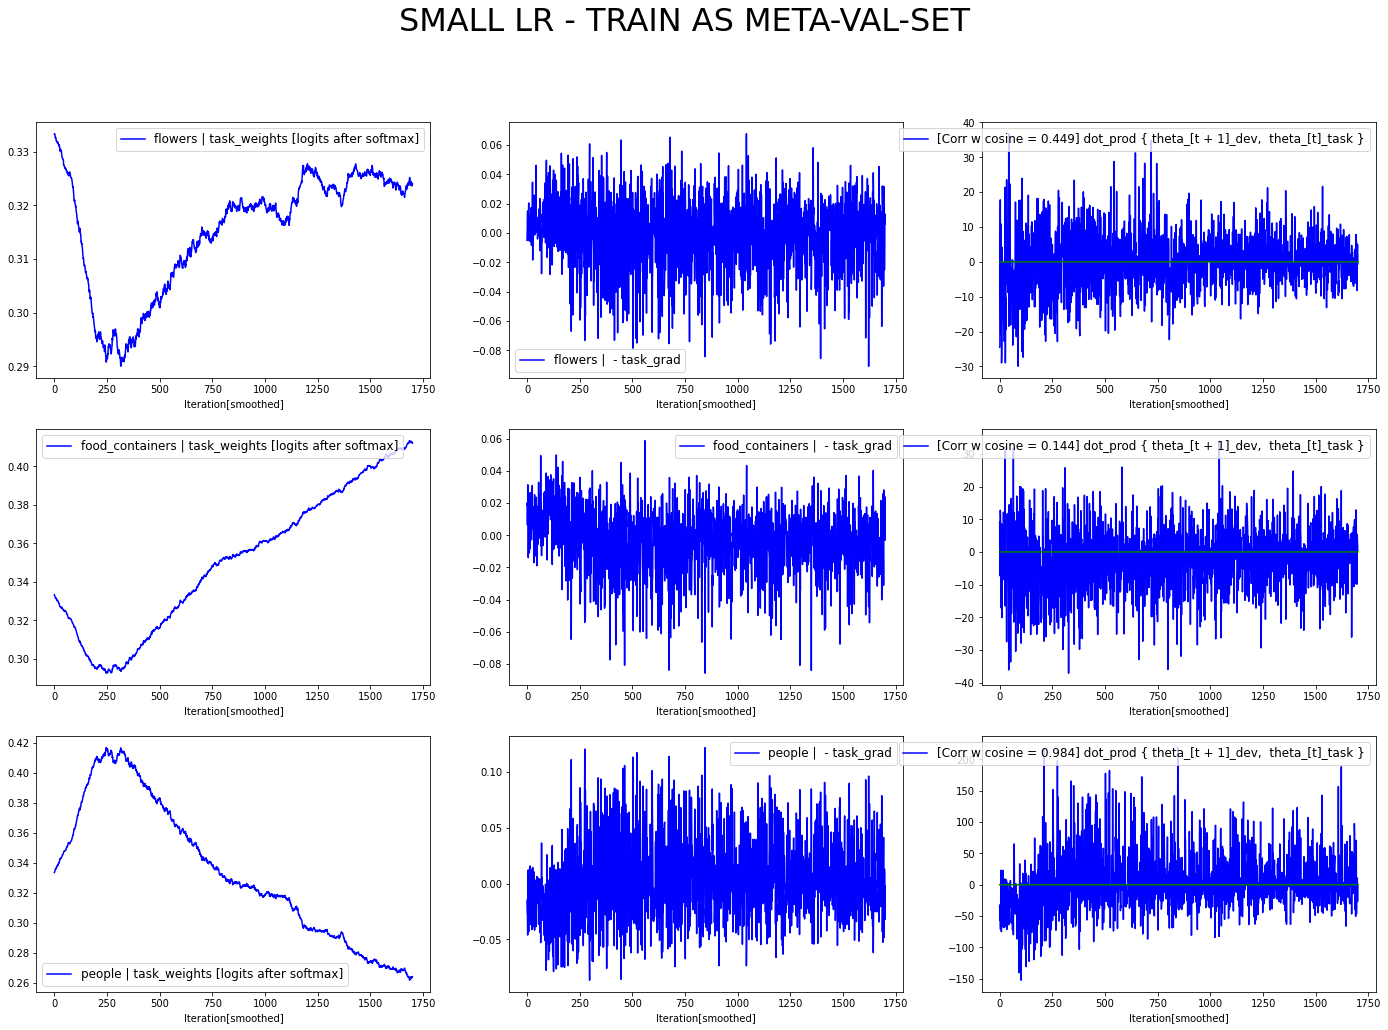

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


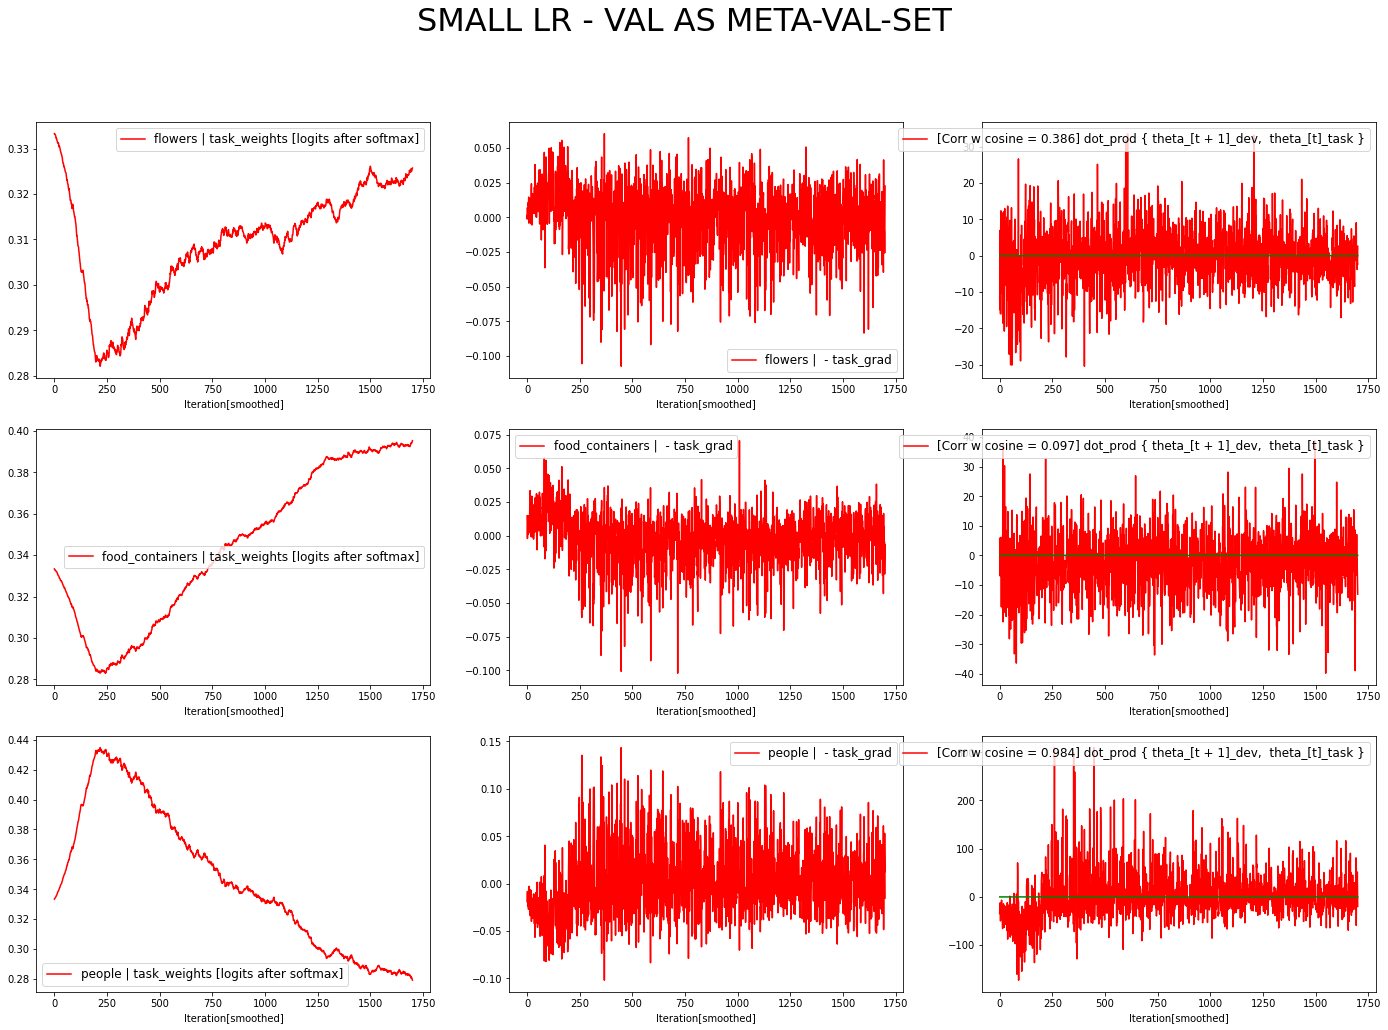

In [11]:
train_small_lr = 'm4m_cache/ablation/train_is_meta/small_lr.softmax/meta_people/0/weight_stats.pkl'
_ = vis_file(train_small_lr, smooth_factor=1, vis_color='blue', title='SMALL LR - TRAIN AS META-VAL-SET')
print("---"*70)
val_small_lr = 'm4m_cache/ablation/val_is_meta/small_lr.softmax/meta_people/0/weight_stats.pkl'
_ = vis_file(val_small_lr, smooth_factor=1, vis_color='red', title='SMALL LR - VAL AS META-VAL-SET')

# Large LR  = 1e-1 #

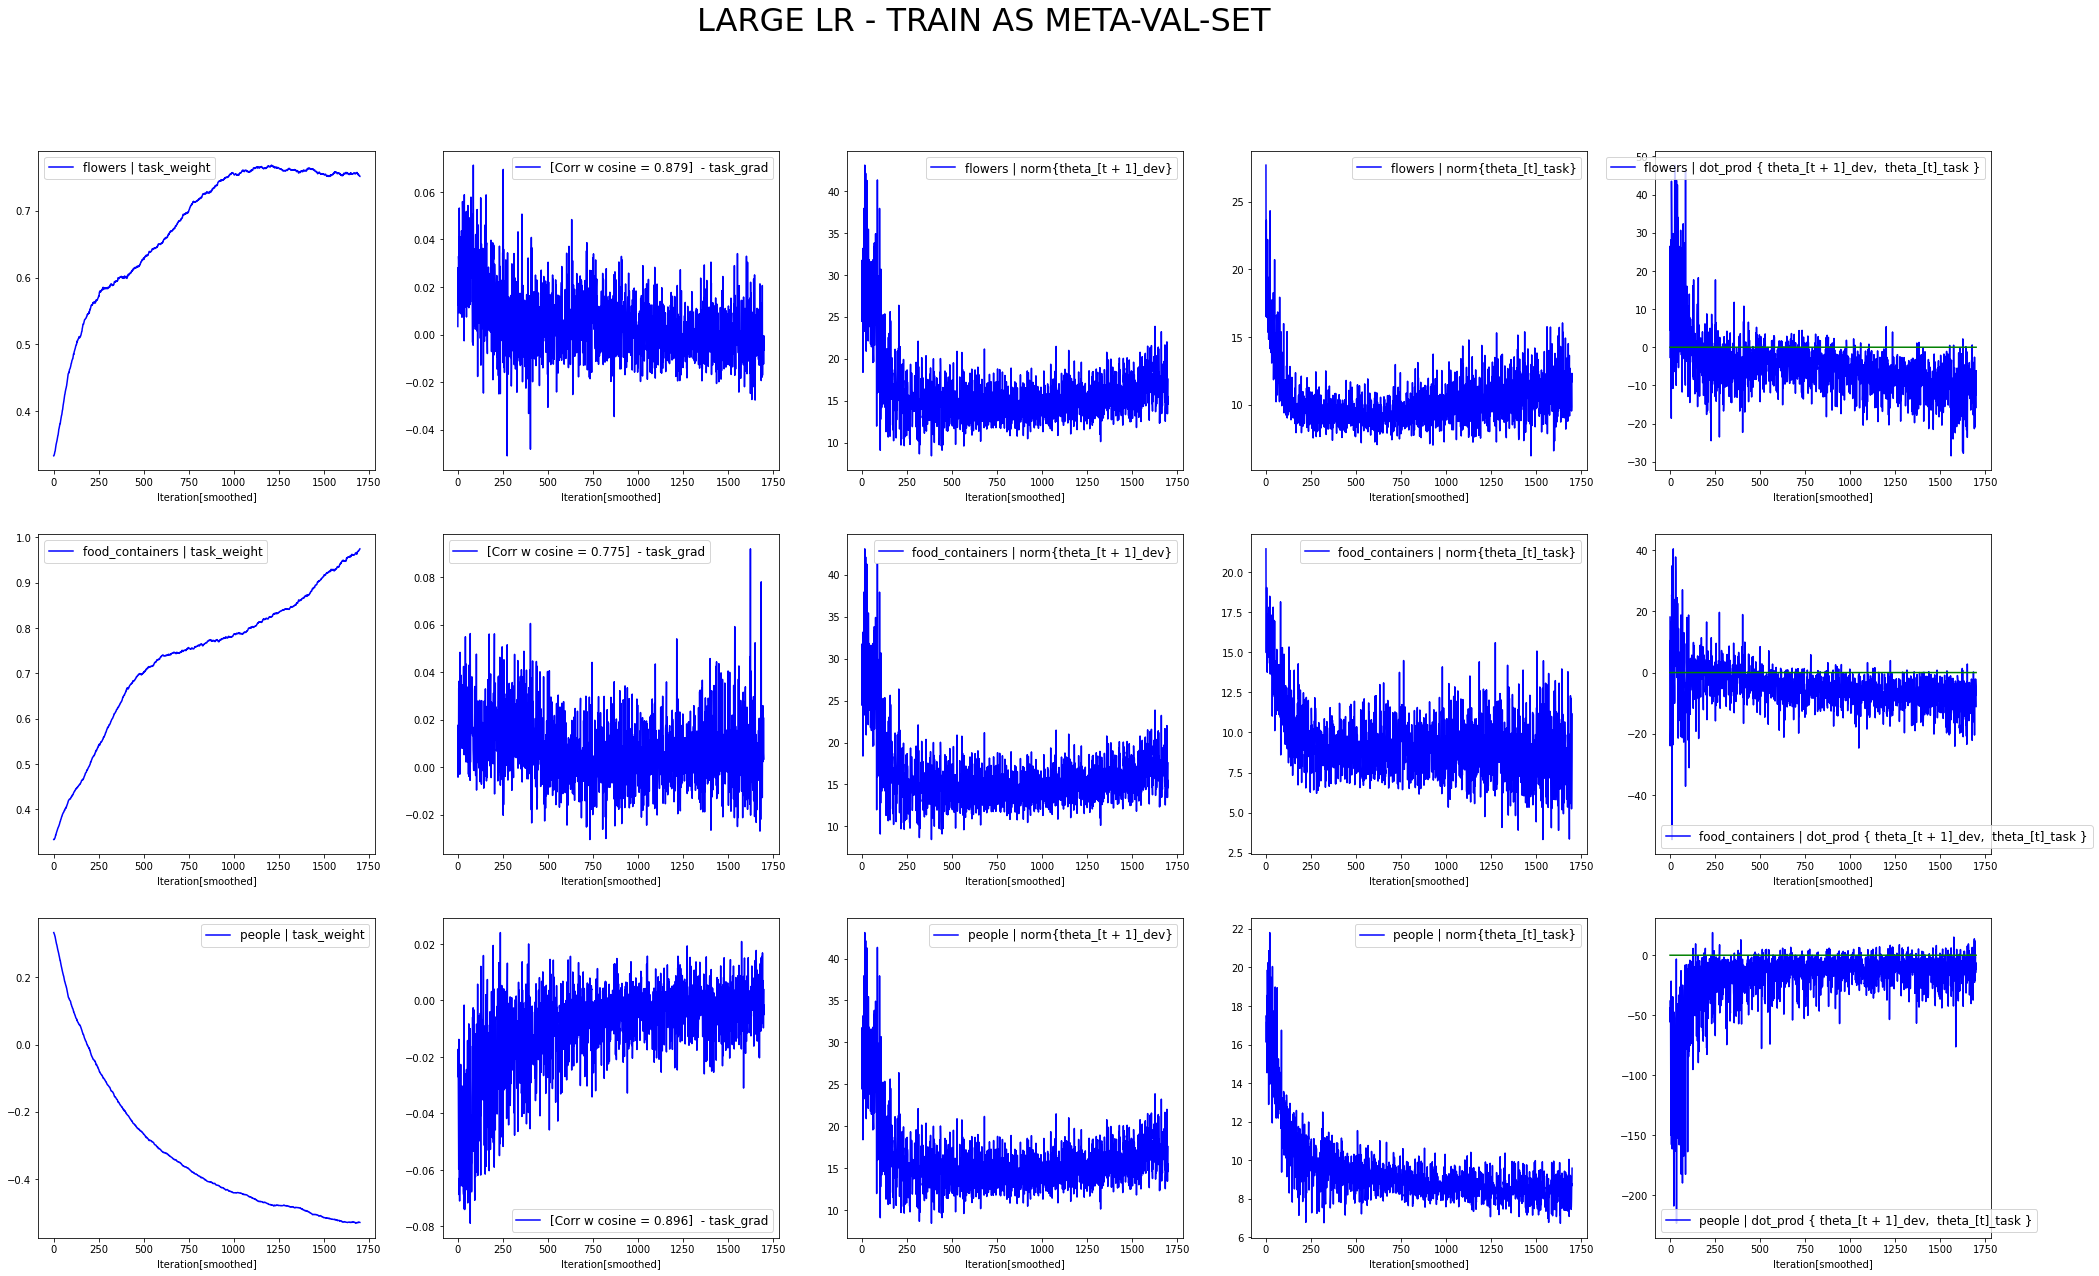

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


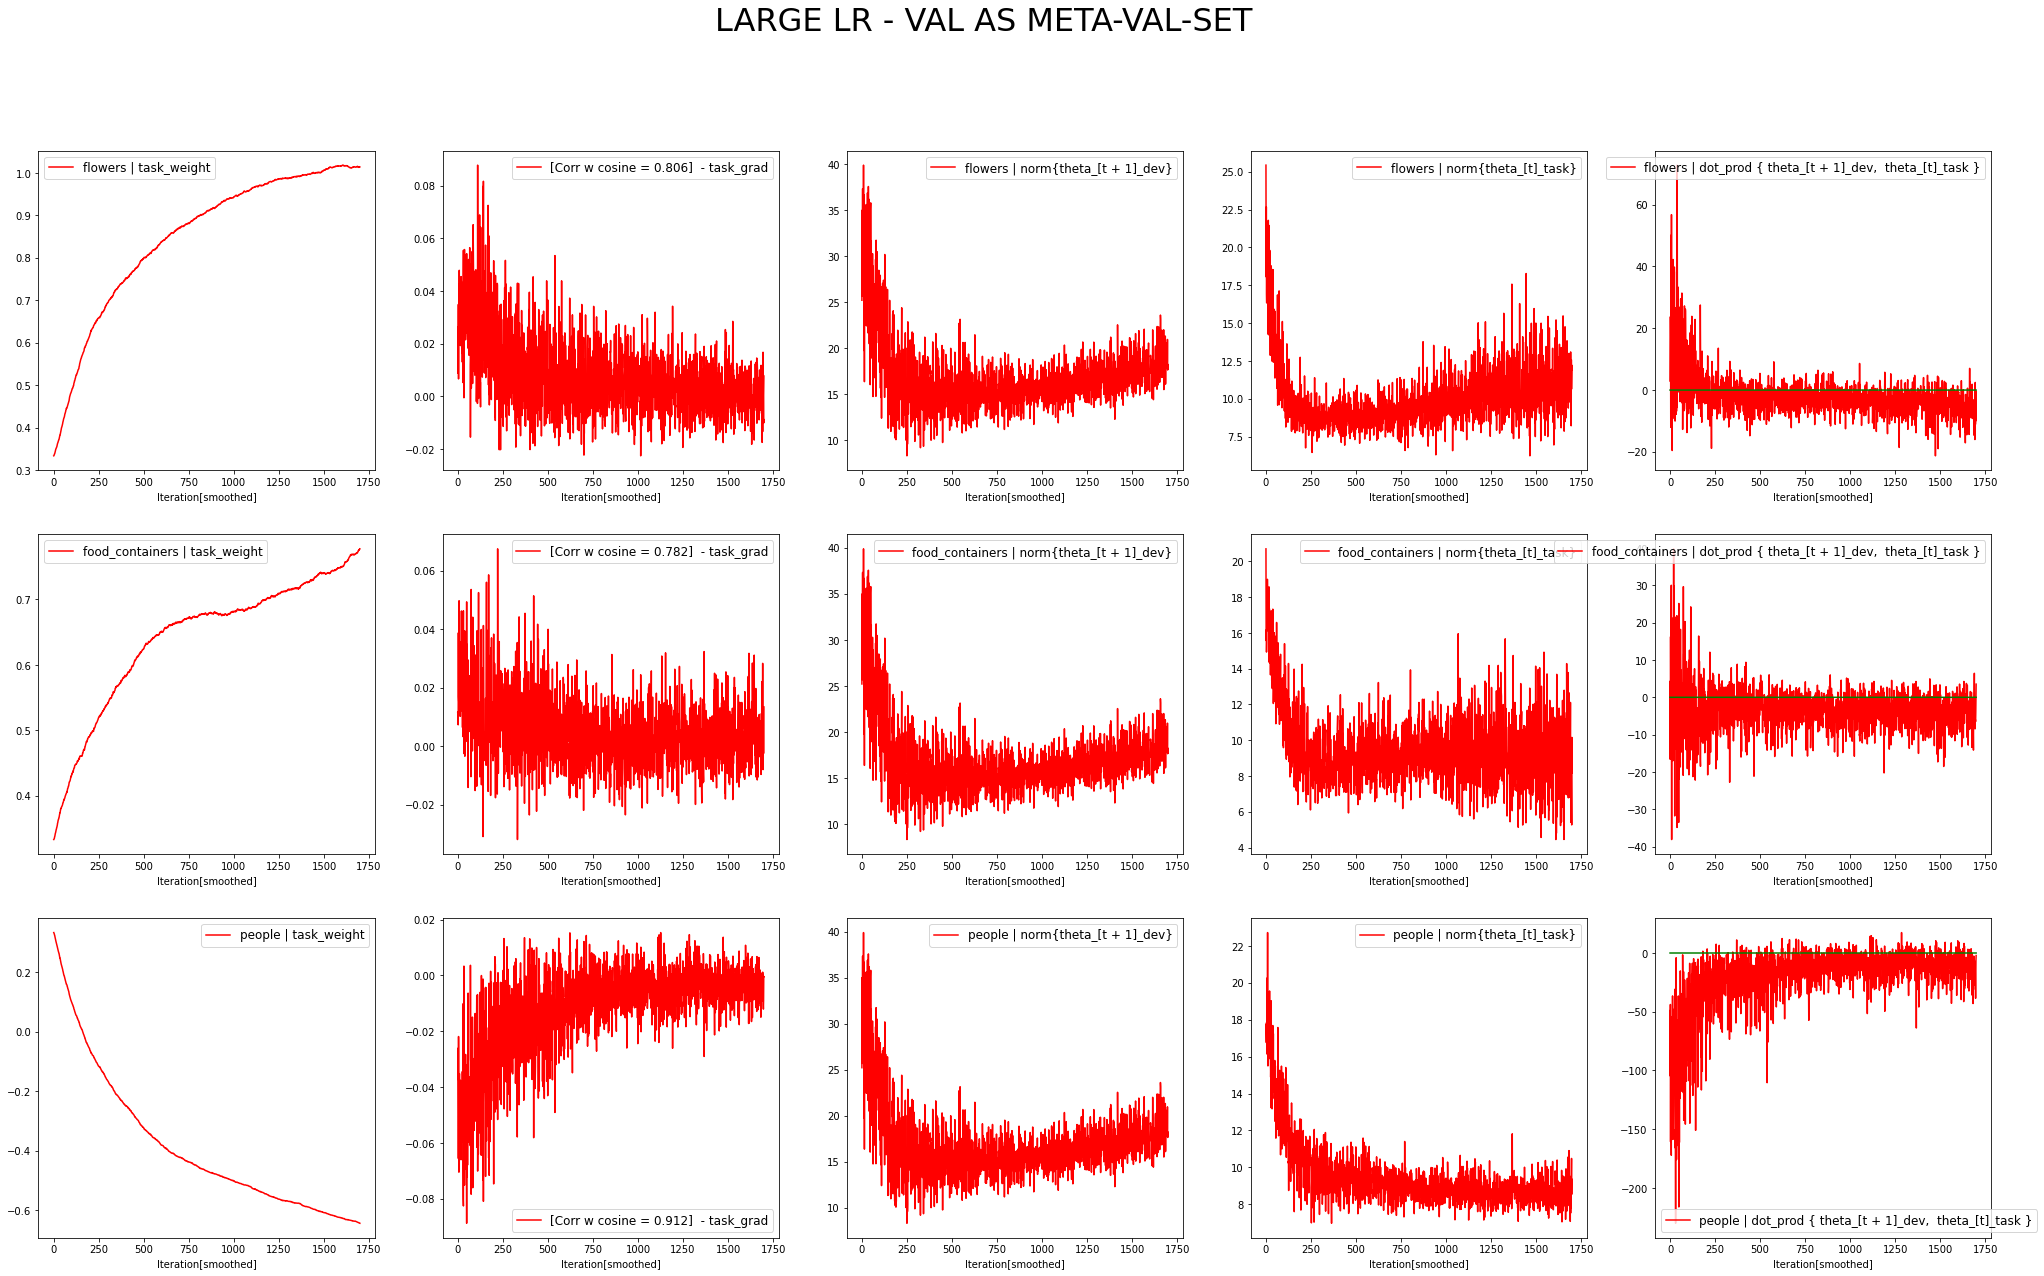

In [37]:
train_large_lr = 'm4m_cache/ablation/train_is_meta/large_lr.softmax/meta_people/0/weight_stats.pkl'
_ = vis_file(train_large_lr, smooth_factor=1, vis_color='blue', title='LARGE LR - TRAIN AS META-VAL-SET')
print("---"*70)
val_large_lr = 'm4m_cache/ablation/val_is_meta/large_lr.softmax/meta_people/0/weight_stats.pkl'
_ = vis_file(val_large_lr, smooth_factor=1, vis_color='red', title='LARGE LR - VAL AS META-VAL-SET')

# Small Inner LR =. 5e-3. Large outer LR #

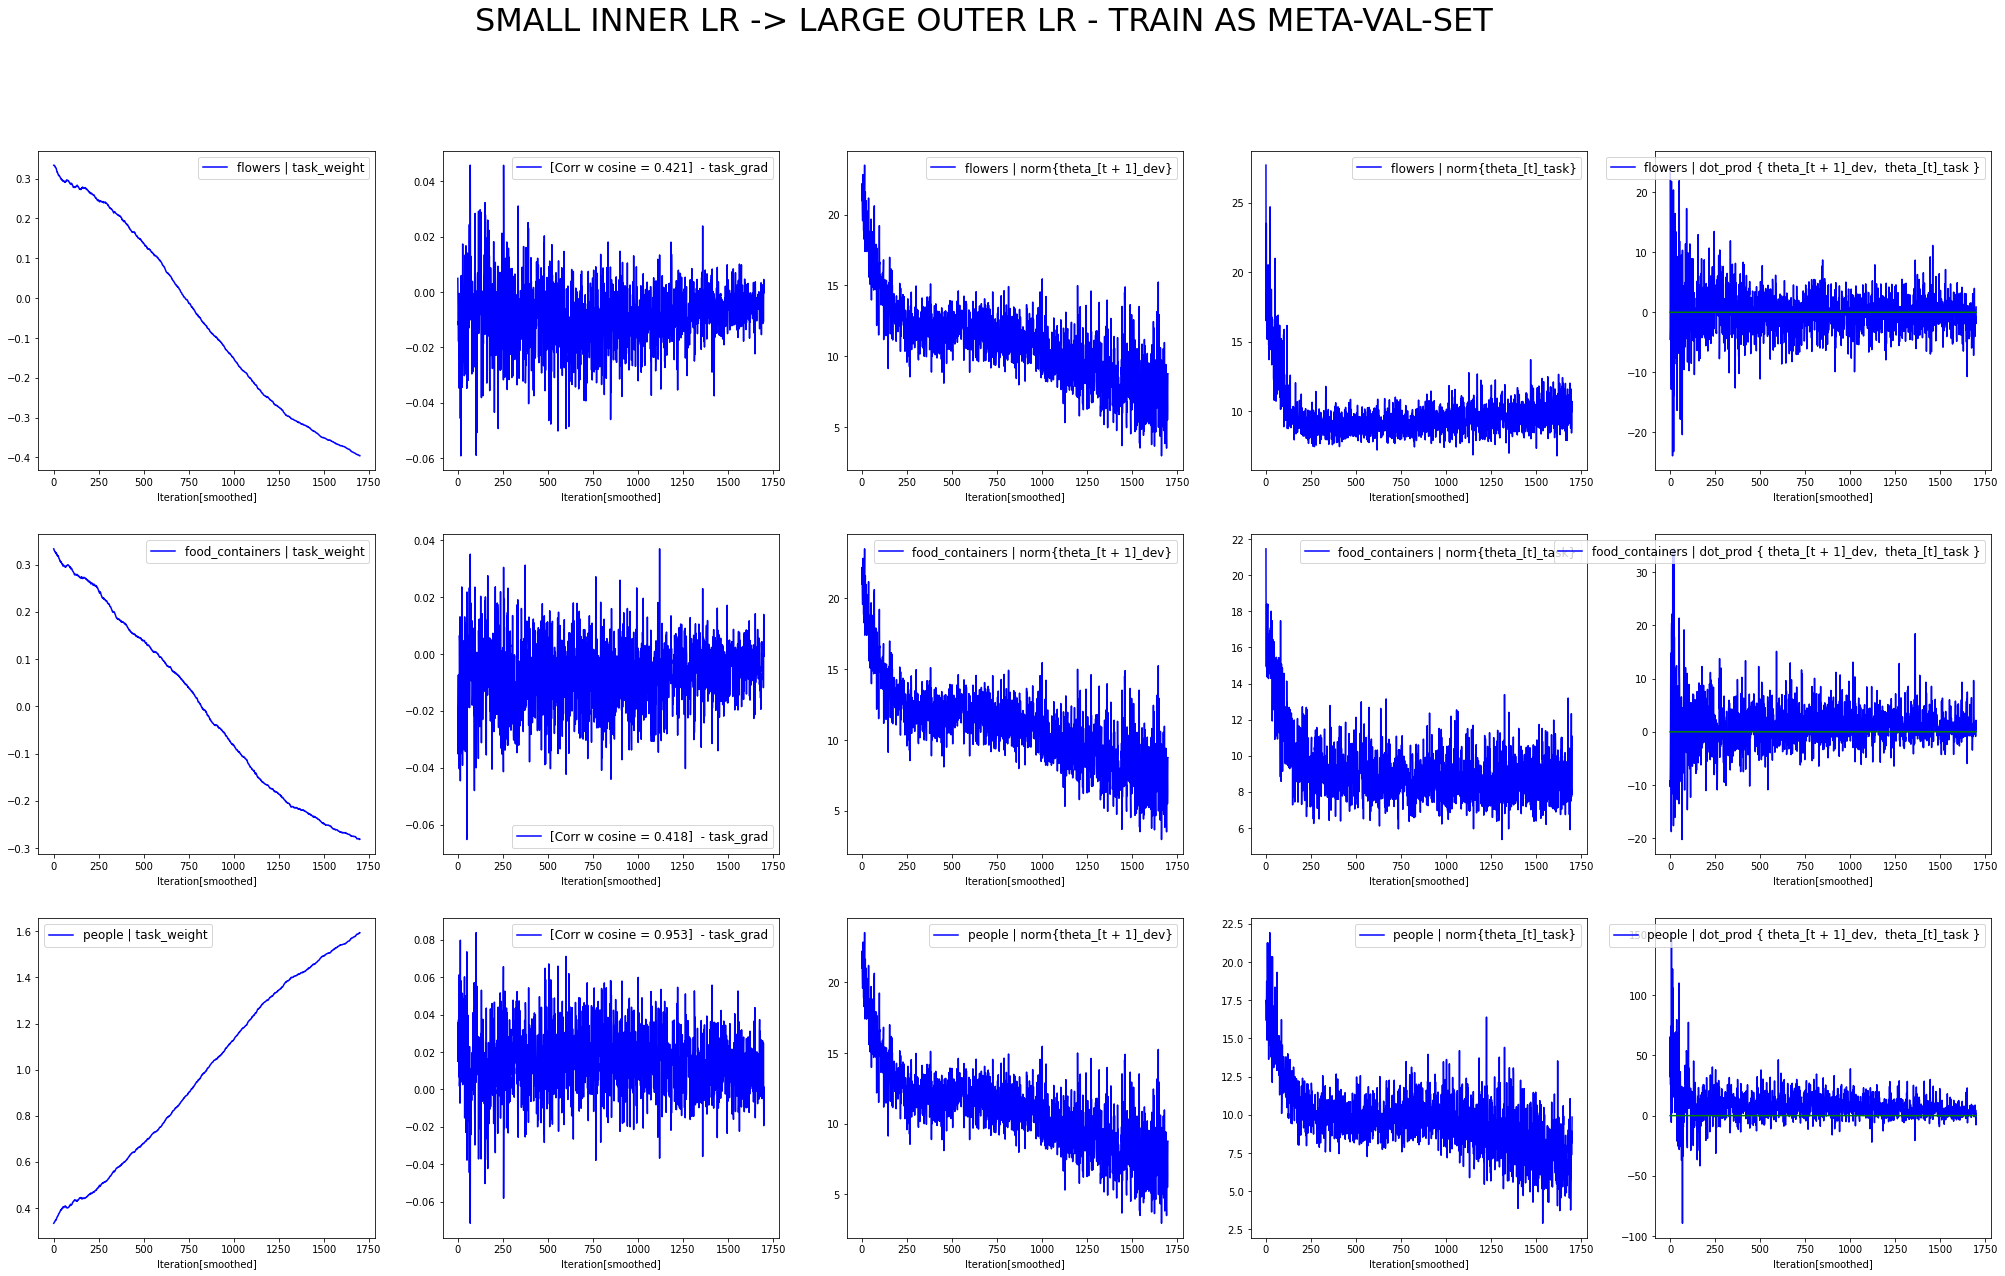

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


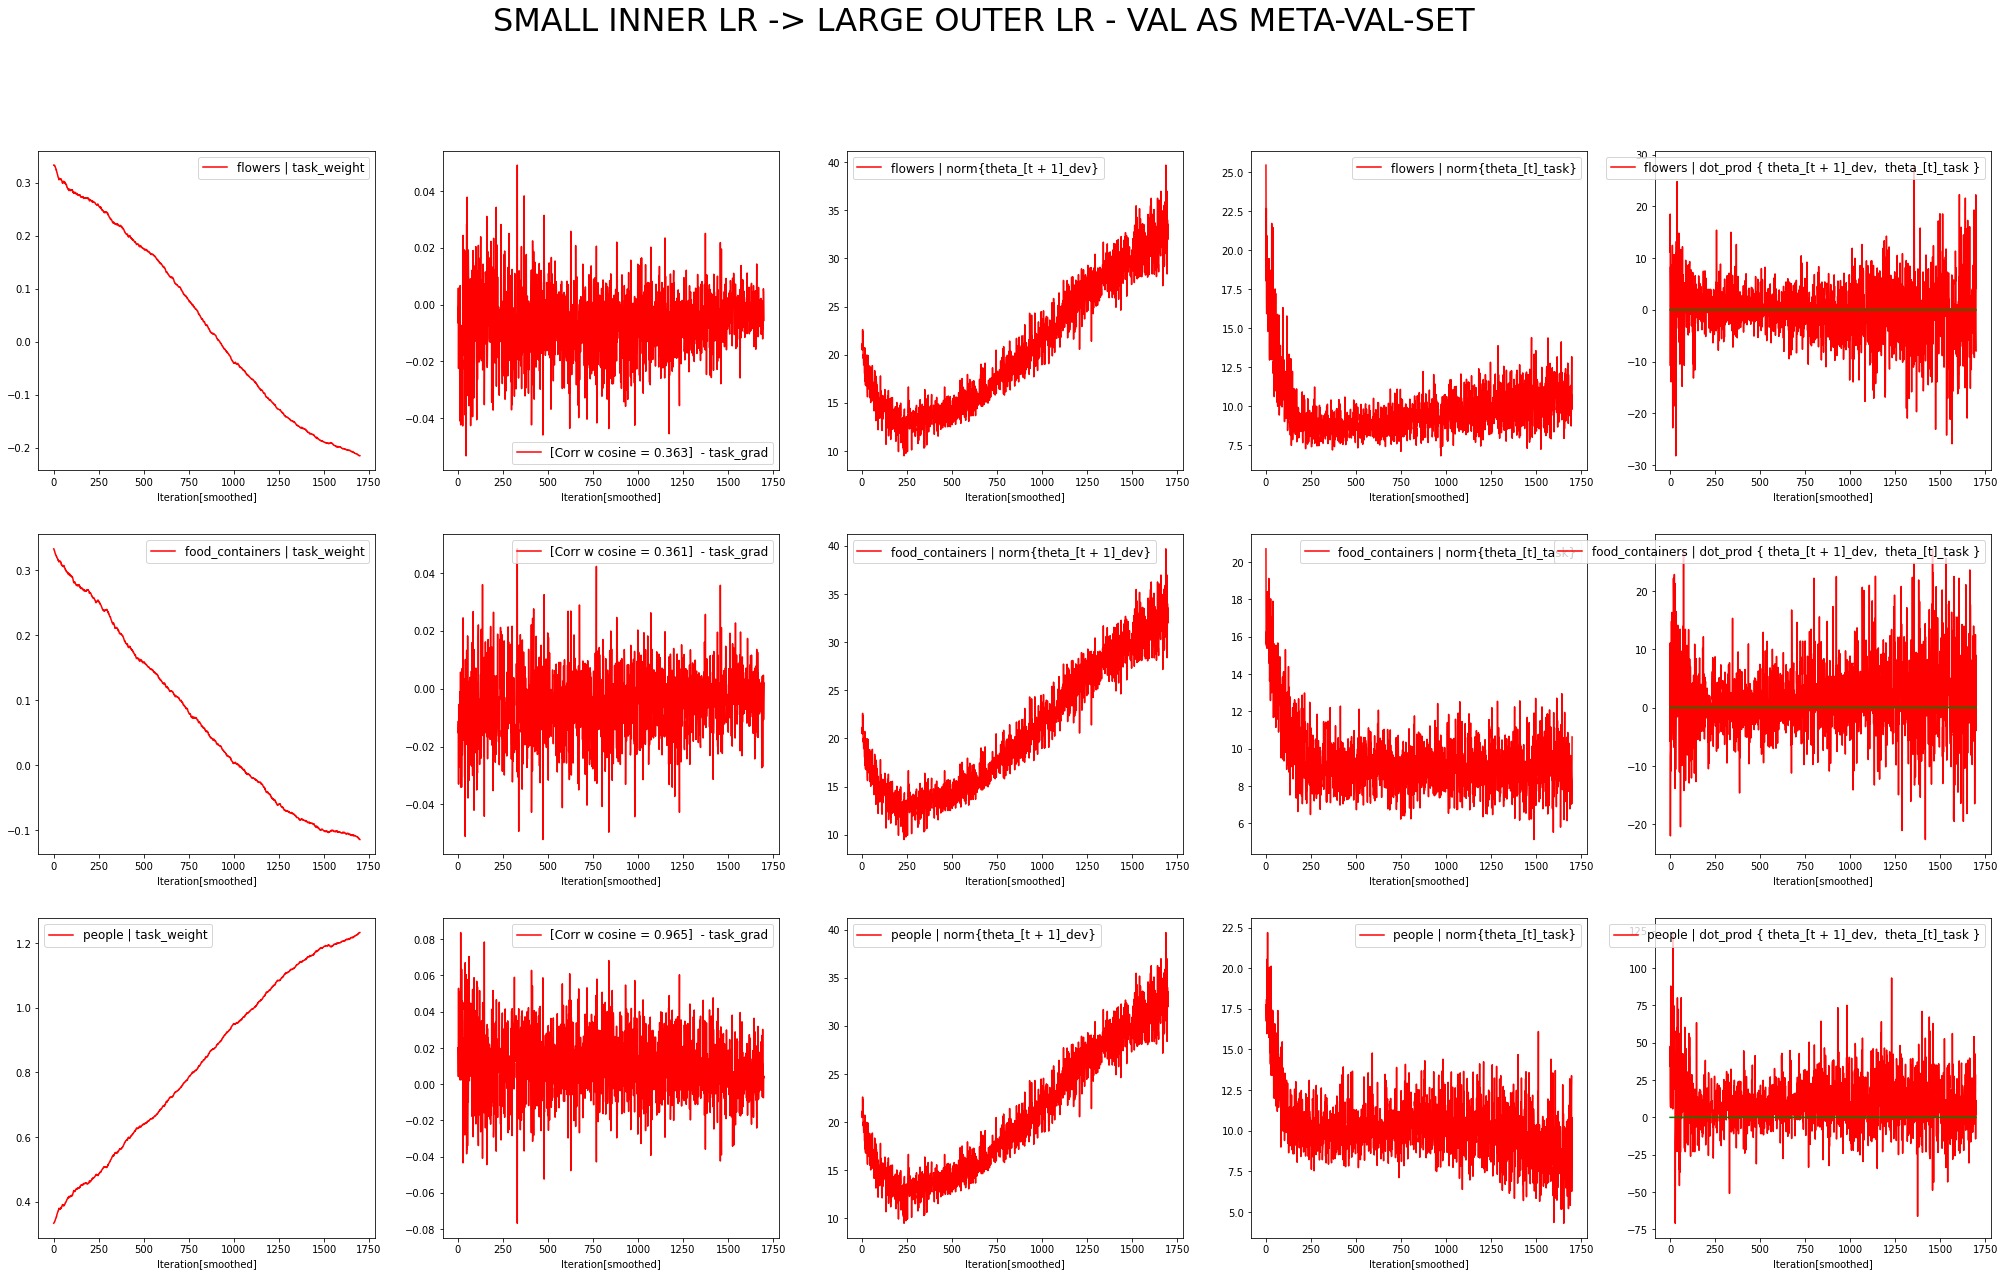

In [38]:
train_sI_LO_lr = 'm4m_cache/ablation/train_is_meta/smallInner-largeOuter-lr.softmax/meta_people/0/weight_stats.pkl'
_ = vis_file(train_sI_LO_lr, smooth_factor=1, vis_color='blue', title='SMALL INNER LR -> LARGE OUTER LR - TRAIN AS META-VAL-SET')
print("---"*70)
val_sI_LO_lr = 'm4m_cache/ablation/val_is_meta/smallInner-largeOuter-lr.softmax/meta_people/0/weight_stats.pkl'
_ = vis_file(val_sI_LO_lr, smooth_factor=1, vis_color='red', title='SMALL INNER LR -> LARGE OUTER LR - VAL AS META-VAL-SET')

# Stepped LR 1e-1 -> x 0.1 every 30 epochs #

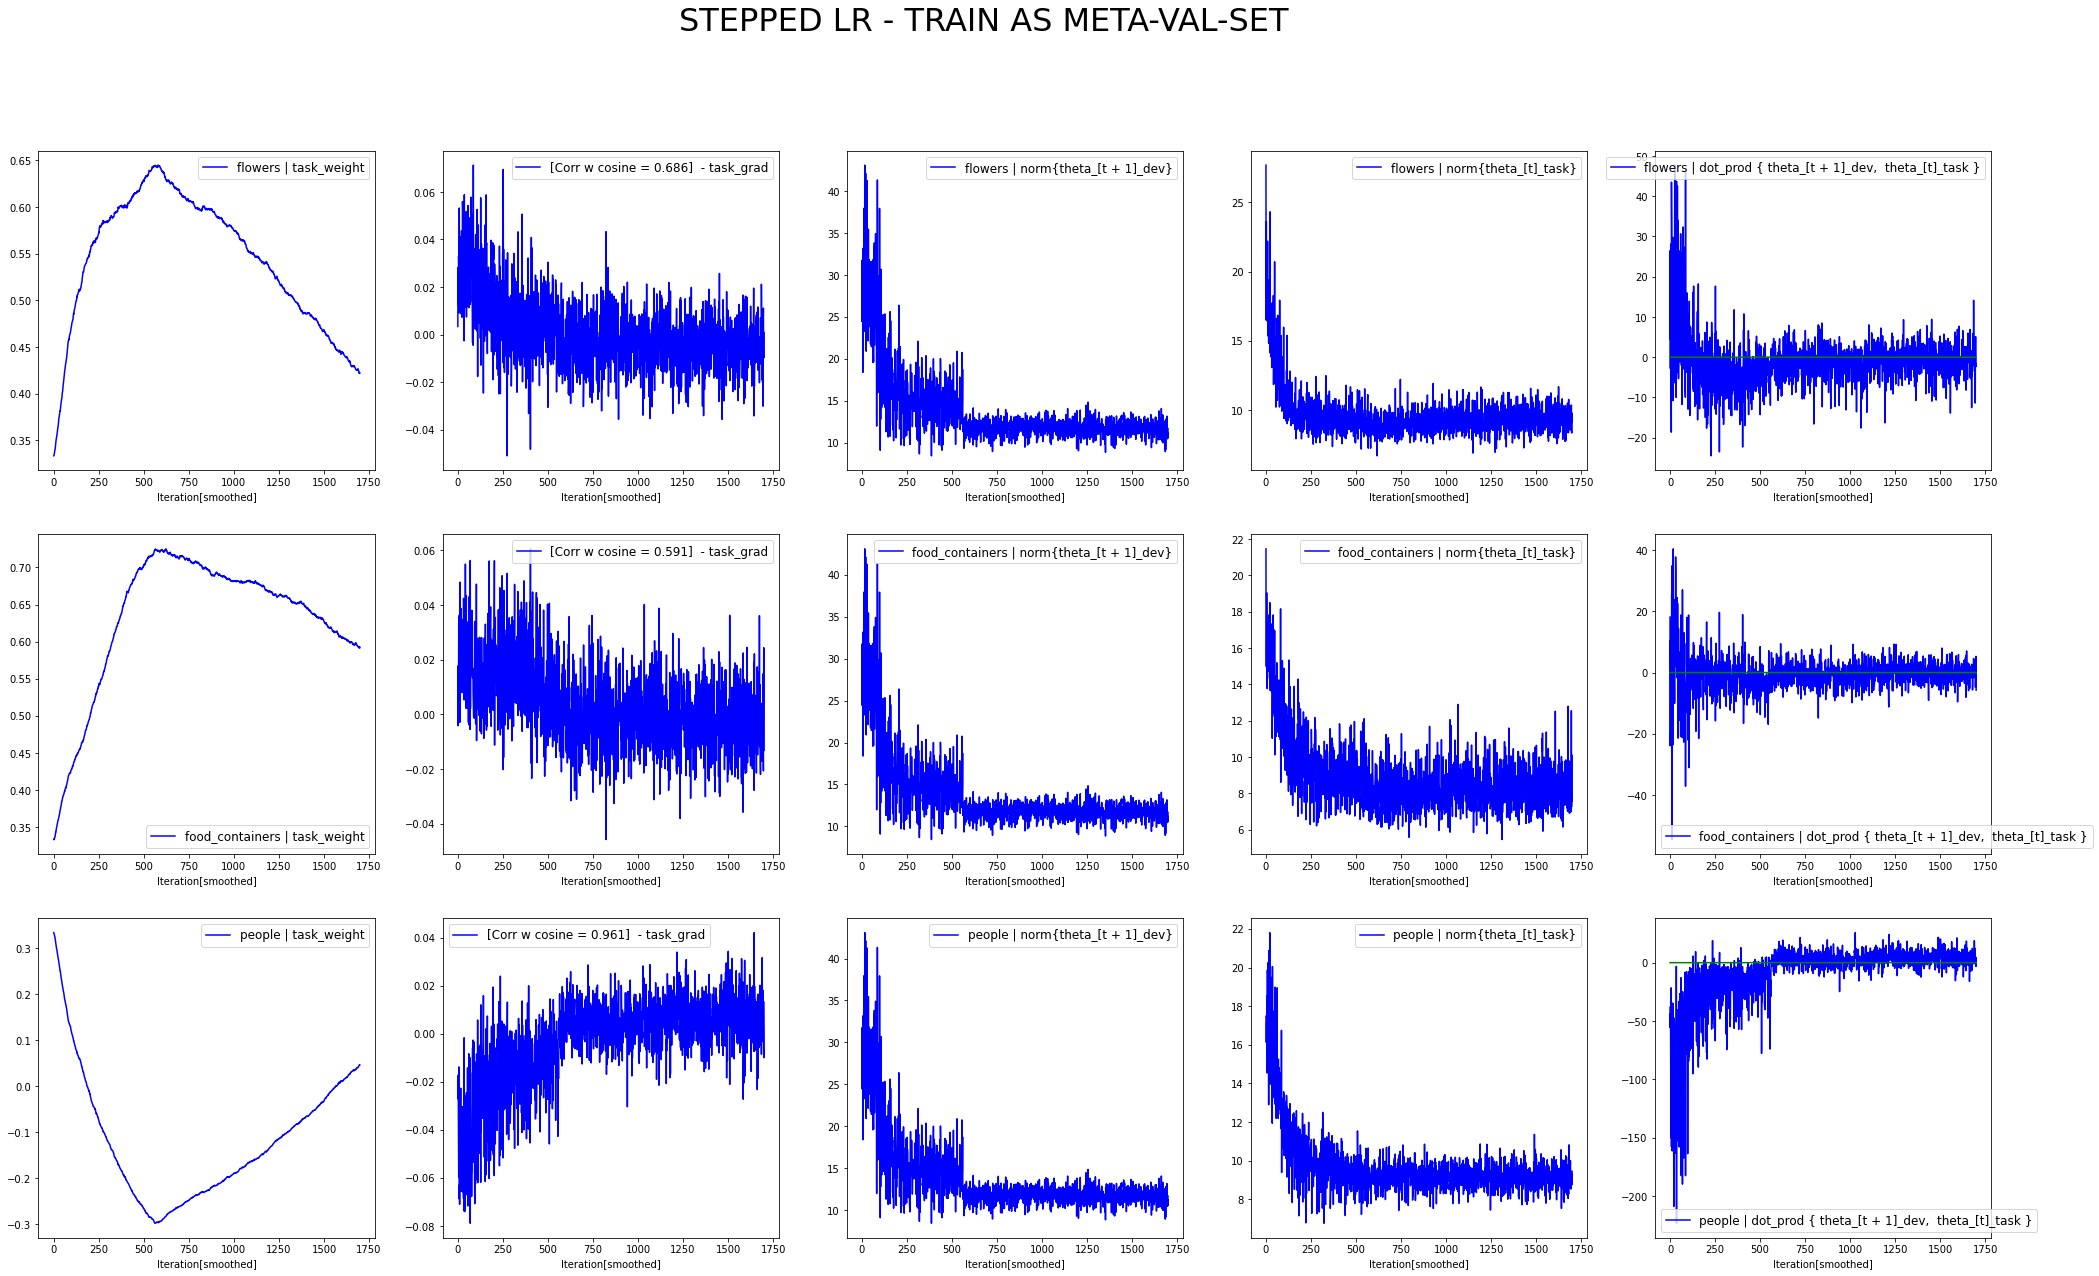

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


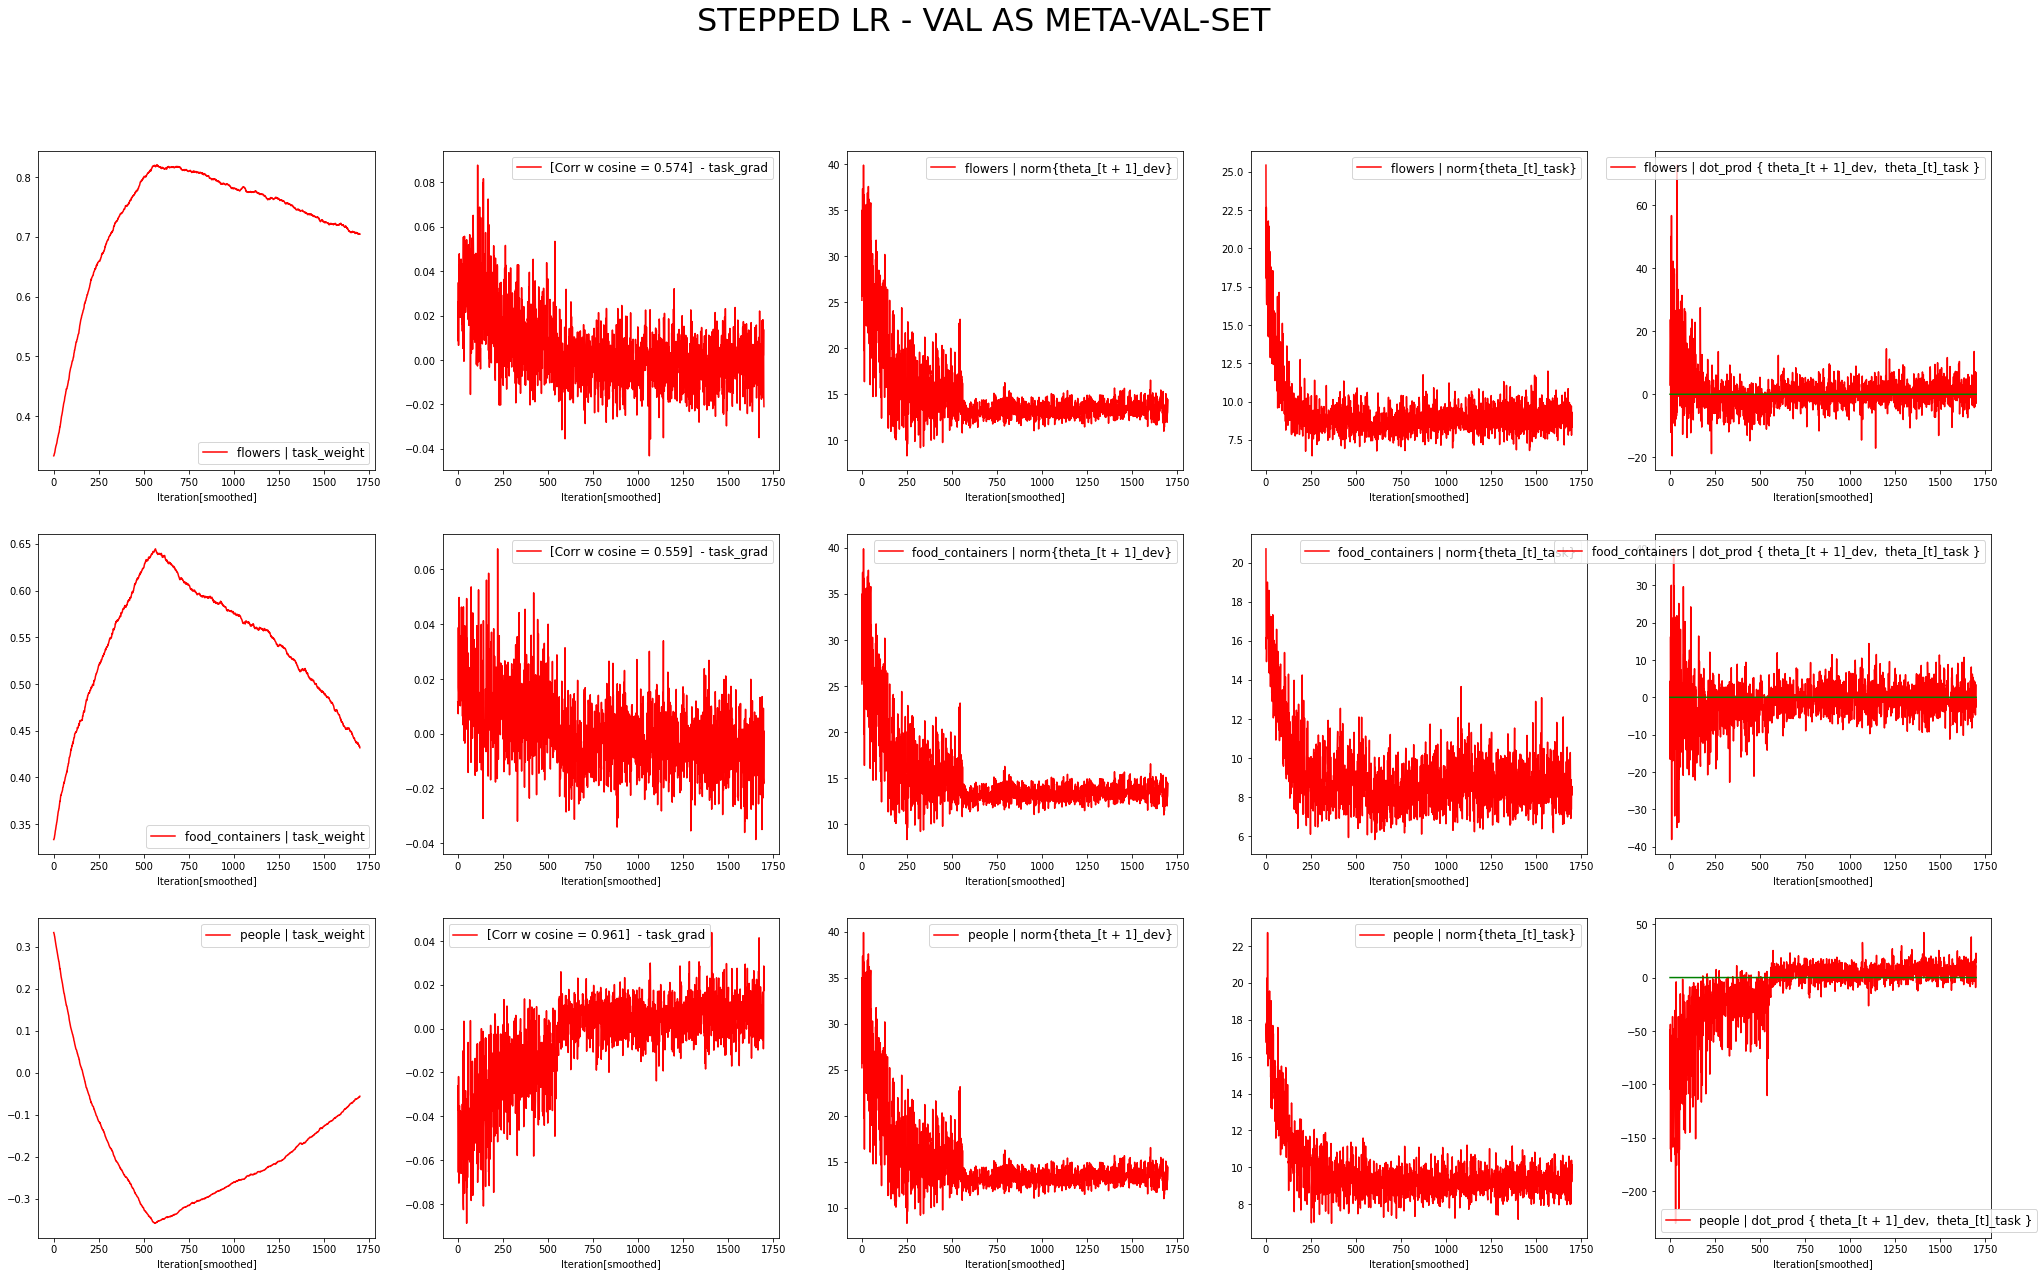

In [7]:
train_stepped = 'm4m_cache/ablation/train_is_meta/stepped_lr.softmax/meta_people/0/weight_stats.pkl'
_ = vis_file(train_stepped, smooth_factor=1, vis_color='blue', title='STEPPED LR - TRAIN AS META-VAL-SET')
print("---"*70)
val_stepped = 'm4m_cache/ablation/val_is_meta/stepped_lr.softmax/meta_people/0/weight_stats.pkl'
data = vis_file(val_stepped, smooth_factor=1, vis_color='red', title='STEPPED LR - VAL AS META-VAL-SET')
# Transition occurs @ epoch 30 when the learning rate is reduced